# 4 - Gradient Boosting: Car Price Prediction

## Project Description
The client company which distributes automobiles, is developing an application for lead generation at the moment. The objective of the data science project is to build a machine learning model for defining a car price in order to put a correct price to the app. The client company pays close attention to the model prediction, execution time (run time) and speed of ML model learning.

## Project Methodology
To enhance data and predictions exploration, go beyond gradient boosting. Try simpler models - sometimes they work even better. These are rare cases that are easy to miss if you always apply only boosting.

Experiment and compare the characteristics of the models: the speed of work, the accuracy of the result. 

## Steps to execute:
Download and prepare data.
Train different models. For each, try different hyperparameters.
Analyze the speed of work and the quality of the models.


## Variables description
Target is a car price (in euro)
Features in the data
- DateCrawled — date of downloading the profile from the database
- VehicleType — vehicle body type
- RegistrationYear — year of vehicle registration
- Gearbox — type of gearbox
- Power — power (hp)
- Model — car model
- Kilometer — mileage (km)
- RegistrationMonth — month of vehicle registration
- FuelType — type of fuel
- Brand — car brand
- NotRepaired — Was the car under repair? Yes / No
- DateCreated — date of creation of the questionnaire
- NumberOfPictures — the number of photos of the car
- PostalCode — postal code of the owner of the questionnaire (user)
- LastSeen — date of last user activity
 
## Data
https://drive.google.com/drive/folders/1c7nagsCq3cUMLun8wiwyxgu99glHtGP3?usp=share_link
********************************************************************************


In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
# !pip install --upgrade warnings : warnings are inbuild we no need to install

# Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Car_Price_prediction\dataset\autos.csv")

In [4]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [7]:
dataset = data.drop(['DateCrawled', 'RegistrationMonth', 'NumberOfPictures', 'DateCreated', 'LastSeen'], axis = 1)

In [8]:
dataset.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,PostalCode
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,70435
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes,66954
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN,90480
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,60437


In [9]:
print(dataset.isnull().values.any())

True


In [10]:
dataset.isnull().sum()

Price                   0
VehicleType         37490
RegistrationYear        0
Gearbox             19833
Power                   0
Model               19705
Kilometer               0
FuelType            32895
Brand                   0
Repaired            71154
PostalCode              0
dtype: int64

In [11]:
def preprocess_input(df):
    df = df.copy()
    
     # Encode missing values as 'none'
    for column in ['VehicleType', 
                   'Gearbox',
                   'Model',
                   'FuelType', 'Repaired']:
        df[column] = df[column].fillna('none')
    
    return df

In [12]:
dataset = preprocess_input(dataset)
dataset.isnull().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
PostalCode          0
dtype: int64

In [13]:
{column : len(dataset[column].unique()) for column in dataset.select_dtypes('object').columns}

{'VehicleType': 9,
 'Gearbox': 3,
 'Model': 251,
 'FuelType': 8,
 'Brand': 40,
 'Repaired': 3}

In [14]:
cat_col=dataset.select_dtypes(include='object').columns
num_col=dataset.select_dtypes(exclude='object').columns
df_cat=dataset[cat_col]
df_num=dataset[num_col]

In [15]:
df_cat.head(2)

,VehicleType,Gearbox,Model,FuelType,Brand,Repaired
0,none,manual,golf,petrol,volkswagen,none
1,coupe,manual,none,gasoline,audi,yes


In [16]:
df_num.head(2)

,Price,RegistrationYear,Power,Kilometer,PostalCode
0,480,1993,0,150000,70435
1,18300,2011,190,125000,66954


# Car Prediction Data Visualization

In [17]:
dataset['Brand'].value_counts()

volkswagen        77013
opel              39931
bmw               36914
mercedes_benz     32046
audi              29456
ford              25179
renault           17927
peugeot           10998
fiat               9643
seat               6907
mazda              5615
skoda              5500
smart              5246
citroen            5148
nissan             4941
toyota             4606
hyundai            3587
sonstige_autos     3374
volvo              3210
mini               3202
mitsubishi         3022
honda              2817
kia                2465
suzuki             2323
alfa_romeo         2314
chevrolet          1754
chrysler           1439
dacia               900
daihatsu            806
subaru              762
porsche             758
jeep                677
trabant             589
land_rover          545
daewoo              542
saab                526
jaguar              505
rover               486
lancia              471
lada                225
Name: Brand, dtype: int64

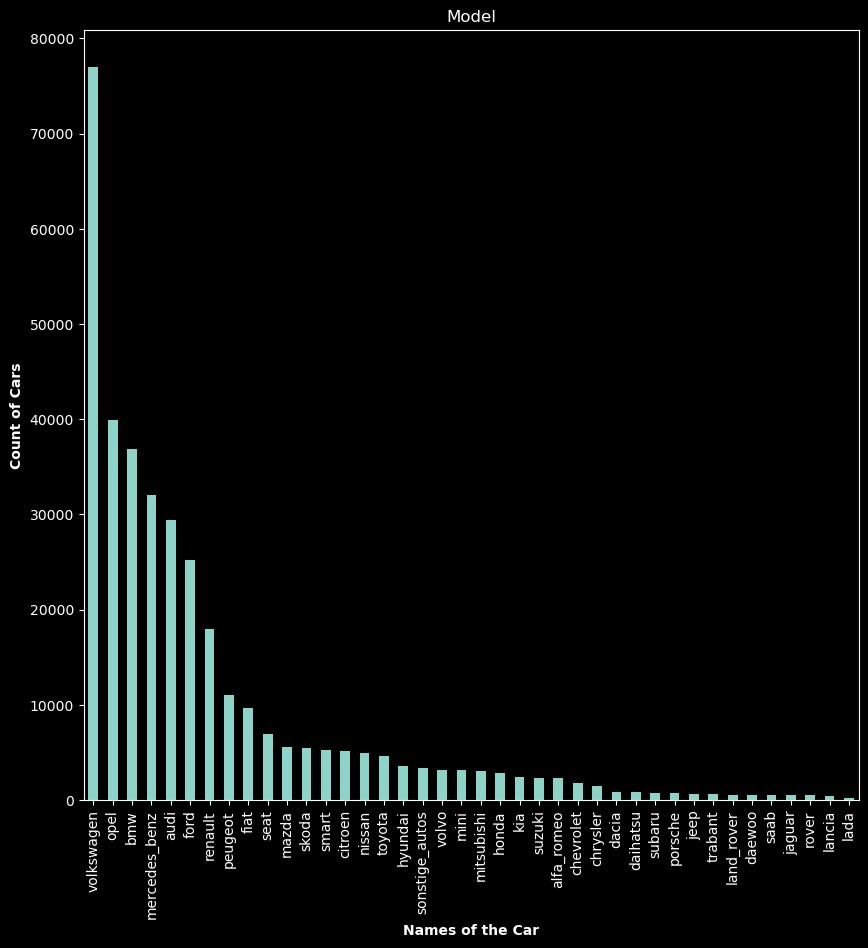

In [18]:
plt.figure(figsize=(10, 10))
ax=dataset['Brand'].value_counts().plot(kind='bar')
plt.title(label='Model')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')
plt.show()

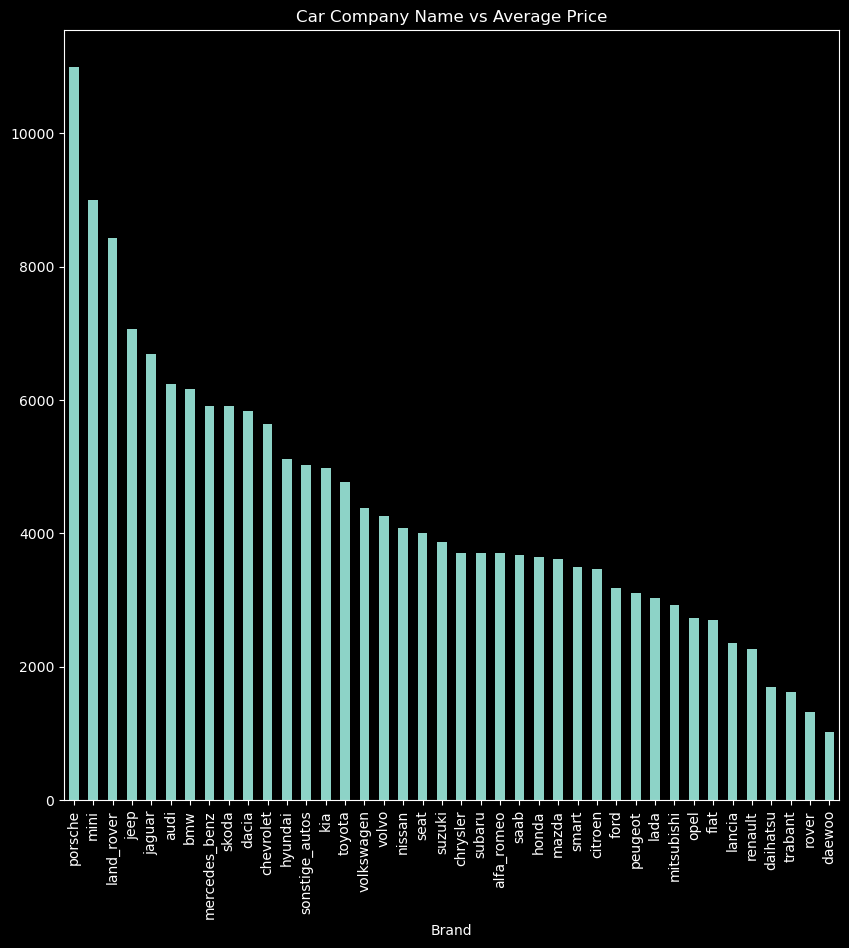

In [19]:
ax=dataset.groupby(['Brand'])['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
ax.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [20]:
{column : len(dataset[column].unique()) for column in dataset.select_dtypes('object').columns}

{'VehicleType': 9,
 'Gearbox': 3,
 'Model': 251,
 'FuelType': 8,
 'Brand': 40,
 'Repaired': 3}

In [21]:
sig_cat_col=['Gearbox','VehicleType','Model','FuelType','FuelType', 'Repaired']

In [22]:
dummies=pd.get_dummies(dataset[sig_cat_col])
print(dummies.shape)
dummies.head()

(354369, 282)


,Gearbox_auto,Gearbox_manual,Gearbox_none,VehicleType_bus,VehicleType_convertible,VehicleType_coupe,VehicleType_none,VehicleType_other,VehicleType_sedan,VehicleType_small,...,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_none,FuelType_other,FuelType_petrol,Repaired_no,Repaired_none,Repaired_yes
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [23]:
df=pd.concat([df_num,dummies],axis=1)

In [24]:
df

,Price,RegistrationYear,Power,Kilometer,PostalCode,Gearbox_auto,Gearbox_manual,Gearbox_none,VehicleType_bus,VehicleType_convertible,...,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_none,FuelType_other,FuelType_petrol,Repaired_no,Repaired_none,Repaired_yes
0,480,1993,0,150000,70435,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,18300,2011,190,125000,66954,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,9800,2004,163,125000,90480,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1500,2001,75,150000,91074,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,3600,2008,69,90000,60437,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,0,2005,0,150000,2694,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
354365,2200,2005,0,20000,39576,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
354366,1199,2000,101,125000,26135,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
354367,9200,1996,102,150000,87439,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [25]:
sig_num_col = ['Price','RegistrationYear','Power','Kilometer','PostalCode']

In [26]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

In [39]:
np.random.seed(0) 

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state = 100)

In [40]:
df_train[sig_num_col]=scaler.fit_transform(df_train[sig_num_col])

In [41]:
df_train.head()

,Price,RegistrationYear,Power,Kilometer,PostalCode,Gearbox_auto,Gearbox_manual,Gearbox_none,VehicleType_bus,VehicleType_convertible,...,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_none,FuelType_other,FuelType_petrol,Repaired_no,Repaired_none,Repaired_yes
349595,-0.845329,-0.102095,-0.120650,0.574431,-1.482884,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
127054,-0.867504,-0.124333,-0.060341,0.574431,1.180689,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
347874,-0.457264,-0.068739,-0.049375,-0.085373,1.883153,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
348155,2.126140,0.098045,-0.000031,-2.064783,-0.978037,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
222811,-0.723365,-0.057620,-0.307061,0.574431,-0.077568,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [42]:
df_test.head()

,Price,RegistrationYear,Power,Kilometer,PostalCode,Gearbox_auto,Gearbox_manual,Gearbox_none,VehicleType_bus,VehicleType_convertible,...,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_none,FuelType_other,FuelType_petrol,Repaired_no,Repaired_none,Repaired_yes
324594,999,2000,54,90000,90461,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
260625,4500,1998,250,150000,44628,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
317680,2900,2001,0,150000,12059,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
77157,4200,2006,102,150000,49661,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
310721,1450,2002,0,150000,70184,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [43]:
df_train.columns

Index(['Price', 'RegistrationYear', 'Power', 'Kilometer', 'PostalCode',
       'Gearbox_auto', 'Gearbox_manual', 'Gearbox_none', 'VehicleType_bus',
       'VehicleType_convertible',
       ...
       'FuelType_electric', 'FuelType_gasoline', 'FuelType_hybrid',
       'FuelType_lpg', 'FuelType_none', 'FuelType_other', 'FuelType_petrol',
       'Repaired_no', 'Repaired_none', 'Repaired_yes'],
      dtype='object', length=287)

# Splitting train dataset into x_train and y_train¶

In [46]:
y_train=df_train.pop('Price')

In [47]:
x_train=df_train

# Building Linear Model

In [48]:
import statsmodels.api as sm

x_train_copy = x_train

In [49]:
x_train_copy1=sm.add_constant(x_train_copy['Power'])

#1st model
lr1=sm.OLS(y_train,x_train_copy1).fit()

In [50]:
lr1.params

const   -1.474515e-17
Power    1.635111e-01
dtype: float64

In [51]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     6814.
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:23:12   Log-Likelihood:            -3.4862e+05
No. Observations:              248058   AIC:                         6.972e+05
Df Residuals:                  248056   BIC:                         6.973e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.475e-17      0.002  -7.44e-15      1.0

In [52]:
def evaluate_model(model, X_test, y_test, classification_threshold=0.5):
    
    y_true = np.array(y_test)
    
    y_pred = (model.predict_proba(X_test) >= classification_threshold).astype(np.int)
    y_pred = list(map(lambda x: x[1], y_pred))

    
    print("Test Accuracy: {:.2f}%".format(accuracy_score(y_true, y_pred) * 100))
    
    cm = confusion_matrix(y_true, y_pred)
    clr = classification_report(y_true, y_pred, target_names=["Not Risky", "Risky"])
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(np.arange(2) + 0.5, ["Low Risk", "High Risk"])
    plt.yticks(np.arange(2) + 0.5, ["Low Risk", "High Risk"])
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

# creating a RF classifier
Random_forest_classifier_model = RandomForestClassifier(
    n_estimators = 200,
    criterion = 'entropy',
    max_depth = 10,
    min_samples_split = 5,
    max_features = 'log2',
)  
  
Random_forest_classifier_model.fit(y_train, y_train)
  
# performing predictions on the test dataset
y_pred = Random_forest_classifier_model.predict(df_text)
   
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[-0.84532875 -0.8675039  -0.45726377 ...  0.08602713  0.24125311
 -0.7122779 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Recursive Feature Elimination (RFE)
as there are too many independent variabls, we will use RFE